In [289]:
import pandas as pd
import numpy as np
import re

In [290]:
# loading the Datasets
data_1 = pd.read_csv("CSV files\houses_1.csv")
data_2 = pd.read_csv('CSV files\houses_2.csv')
data_3 = pd.read_csv('CSV files\houses_3.csv')
data_4 = pd.read_csv('CSV files\houses_5.csv')

In [291]:
display(data_1)
display(data_2)
display(data_3)
display(data_4)

,location,size,rooms,land_area,description,seller,price
0,Großröhrsdorf (Großröhrsdorf),180 m²,NaN,1266 m² Grundstück,"wohnen im Villenstil, Zweifamilienhaus nahe Dr...",Maklerbüro Haufe,244.000 €
1,"Eulensteg 28, Markkleeberg (Markkleeberg)",140 m²,5 Zi.,252 m² Grundstück,SELTENER GLÜCKSFALL! Vielseitig Talentierte Do...,WIK24 Immobilien,490.000 €
2,Neukirch/Lausitz,176 m²,7 Zi.,400 m² Grundstück,großteils modern saniertes Einfamilienhaus in ...,Maklerbüro Haufe,159.000 €
3,Magdeburg (Westerhüsen),156.23 m²,8 Zi.,313 m² Grundstück,Ein wirklich cooles Haus zum Leben!,Andreas Schmidt Immobilien,425.000 €
4,Königs Wusterhausen (Zernsdorf),130 m²,6 Zi.,820 m² Grundstück,Individuelles Einfamilienhaus in bester Lage v...,Gojowczyk Grundstücksverwaltung/ Immobilien,660.000 €
...,...,...,...,...,...,...,...
9375,Friedland (Friedland),100 m²,4 Zi.,637 m² Grundstück,"Einfamilienhaus (BVH) ""Am Brink"" in 17098 Frie...",Linde-Immobilien,209.999 €
9376,Borna (Neukirchen),184 m²,5 Zi.,1074 m² Grundstück,einzigartiges lichtdurchflutetes Traumhaus der...,Massa Haus Vertriebspartner,419.000 €
9377,Walsleben,150 m²,7 Zi.,1420 m² Grundstück,"Wohnhaus mit separaten Bungalow ,Doppelgarage ...",Ruppiner-Immobilien,250.000 €
9378,Kremmen (Flatow),130 m²,4 Zi.,589 m² Grundstück,"Super Wohnhaus für die ganze Familie , saniert...",Ruppiner-Immobilien,349.900 €


,location,size,rooms,land_area,description,seller,price
0,Großröhrsdorf (Großröhrsdorf),180 m²,NaN,1266 m² Grundstück,"wohnen im Villenstil, Zweifamilienhaus nahe Dr...",Maklerbüro Haufe,244.000 €
1,"Eulensteg 28, Markkleeberg (Markkleeberg)",140 m²,5 Zi.,252 m² Grundstück,SELTENER GLÜCKSFALL! Vielseitig Talentierte Do...,WIK24 Immobilien,490.000 €
2,Neukirch/Lausitz,176 m²,7 Zi.,400 m² Grundstück,großteils modern saniertes Einfamilienhaus in ...,Maklerbüro Haufe,159.000 €
3,"Up Willmannsland 3, Bremen (Lesum)",158.92 m²,6 Zi.,651 m² Grundstück,Bremen-Lesum - großzü. Einfamilienhaus mit sep...,HWG Bau Immobilien Egon Horsthemke,445.000 €
4,Hamburg (Neugraben-Fischbek),93 m²,4 Zi.,1162 m² Grundstück,HANDWERKERPERLE IN BEVORZUGTER LAGE MIT ZUSÄTZ...,Immowerk42 Eine Marke der Bauwerk42 GmbH,720.000 €
...,...,...,...,...,...,...,...
7344,Hamburg (Langenhorn),150 m²,4 Zi.,209 m² Grundstück,Individuelle Doppelhaushälfte im Grünen von Ha...,ADLERSHORST Immobilien GmbH,639.000 €
7345,Bernsdorf (Bernsdorf),140 m²,5 Zi.,519 m² Grundstück,Geräumige Doppelhaushälfte in Bernsdorf/OL zu ...,Schmidt Immobilien,315.000 €
7346,Borna (Neukirchen),184 m²,5 Zi.,1074 m² Grundstück,einzigartiges lichtdurchflutetes Traumhaus der...,Massa Haus Vertriebspartner,419.000 €
7347,Dornburg-Camburg (Camburg),120 m²,5 Zi.,1000 m² Grundstück,"Einfamilienhaus (Neubau) in Camburg *1.300,- E...",System-Massivhaus GmbH &amp; Co. KG,390.000 €


,location,size,rooms,land_area,description,seller,price
0,Mespelbrunn (Mespelbrunn),290 m²,10 Zi.,1802 m² Grundstück,Viel Raum zum Wohnen - viel Platz für Freizeit!,ELK-IMMOBILIEN GmbH,495.000 €
1,"Glockenstr. 24f, Bayreuth (Glocke)",116.3 m²,4 Zi.,138.34 m² Grundstück,"Attraktives Reihenmittelhaus mit Garten, Stell...",Andreas Ulrich Immobilien,390.000 €
2,München (Feldmoching-Hasenbergl),120 m²,4 Zi.,413 m² Grundstück,Das könnte Ihre neues Haus werden - Freisthend...,Gebelein Immobilien GmbH,1.460.000 €
3,Kulmbach (Burghaig),220 m²,8 Zi.,970 m² Grundstück,"*** Ein Highlight, Fernsicht inclusive***",VR Bank Oberfranken Mitte eG,598.500 €
4,Ottensoos (Ottensoos),306.3 m²,7 Zi.,1200 m² Grundstück,Ihr Traum könnte wahr werden... Wohn- und Gesc...,Wüstenrot Immobilien,auf Anfrage
...,...,...,...,...,...,...,...
9887,Fladungen (Heufurt),160 m²,10 Zi.,460 m² Grundstück,"Großes Haus mit Innenhof, und Nebengebäude...",Peter Fladung Immobilien IVD Peter Fladung,98.500 €
9888,Dombühl (Dombühl),100.64 m²,4 Zi.,332 m² Grundstück,Erfüllen Sie sich Ihren Traum - DHH in Dombühl,Ewald Madl Immobilien - Finanzierungen,360.500 €
9889,München (Schwabing-West),900 m²,NaN,350 m² Grundstück,Wohnhaus in München - Bestlage,Bichlmeier Immobilien,21.000.000 €
9890,Schwandorf (Dachelhofen),88 m²,4 Zi.,475 m² Grundstück,Reihenmittelhaus in ruhiger und familienfreund...,ms f.i.ve makler,185.000 €


,location,size,rooms,land_area,description,seller,price
0,Riederich,231 m²,8 Zi.,533 m² Grundstück,"+++ Zwei Häuser, ein Preis. Mehr-Generationeno...",InPro-Immobilien,779.000 €
1,Leutenbach (Weiler zum Stein),156 m²,5 Zi.,467 m² Grundstück,Tolles Einfamilienhaus mit großzügigem Garten ...,P Immobilien Beratung GmbH,595.000 €
2,Schwaikheim,120 m²,5.5 Zi.,467 m² Grundstück,Handwerker aufgepasst - Einfamilienhaus inkl. ...,P Immobilien Beratung GmbH,498.000 €
3,Gaildorf (Ottendorf),182 m²,7 Zi.,874 m² Grundstück,"freistehendes 1-2 Familienhaus, weiterer Hausb...",Ambiente Immobilien Ulrike Maier,325.000 €
4,Bietigheim-Bissingen (Bietigheim),210 m²,7 Zi.,550 m² Grundstück,WEITBLICK: Hier können Sie sich verwirklichen!,Weitblick Immobilien GmbH,749.000 €
...,...,...,...,...,...,...,...
8421,Wellendingen (Wilflingen),210 m²,7 Zi.,450 m² Grundstück,Wohnen und Arbeiten unter einem Dach! Ideal fü...,frb Immobilien - Frank Rudolf Braun,298.000 €
8422,Crailsheim (Crailsheim),255 m²,9 Zi.,650 m² Grundstück,Mehrfamilienhaus in Crailsheim,Aalbok Immobilien,450.000 €
8423,St.Johann (Upfingen),326 m²,5 Zi.,553 m² Grundstück,Ökologisch Bauen mit Rolf'Dan-Projekt' Beispie...,Anugraha Schloß Lindich Portfolio- Immobilien ...,508.000 €
8424,Lottstetten (Lottstetten),180 m²,6.5 Zi.,1150 m² Grundstück,Zweifamilienhaus in Toplage von Lottstetten,Haus &amp; Grund Hochrhein Service GmbH,465.000 €


In [292]:
# concatenating DataFrames into one big df
# dropping the duplicates
data = pd.concat([data_1, data_2, data_3, data_4], axis = 0)
data = data.drop_duplicates()

In [293]:
data

,location,size,rooms,land_area,description,seller,price
0,Großröhrsdorf (Großröhrsdorf),180 m²,NaN,1266 m² Grundstück,"wohnen im Villenstil, Zweifamilienhaus nahe Dr...",Maklerbüro Haufe,244.000 €
1,"Eulensteg 28, Markkleeberg (Markkleeberg)",140 m²,5 Zi.,252 m² Grundstück,SELTENER GLÜCKSFALL! Vielseitig Talentierte Do...,WIK24 Immobilien,490.000 €
2,Neukirch/Lausitz,176 m²,7 Zi.,400 m² Grundstück,großteils modern saniertes Einfamilienhaus in ...,Maklerbüro Haufe,159.000 €
3,Magdeburg (Westerhüsen),156.23 m²,8 Zi.,313 m² Grundstück,Ein wirklich cooles Haus zum Leben!,Andreas Schmidt Immobilien,425.000 €
4,Königs Wusterhausen (Zernsdorf),130 m²,6 Zi.,820 m² Grundstück,Individuelles Einfamilienhaus in bester Lage v...,Gojowczyk Grundstücksverwaltung/ Immobilien,660.000 €
...,...,...,...,...,...,...,...
8421,Wellendingen (Wilflingen),210 m²,7 Zi.,450 m² Grundstück,Wohnen und Arbeiten unter einem Dach! Ideal fü...,frb Immobilien - Frank Rudolf Braun,298.000 €
8422,Crailsheim (Crailsheim),255 m²,9 Zi.,650 m² Grundstück,Mehrfamilienhaus in Crailsheim,Aalbok Immobilien,450.000 €
8423,St.Johann (Upfingen),326 m²,5 Zi.,553 m² Grundstück,Ökologisch Bauen mit Rolf'Dan-Projekt' Beispie...,Anugraha Schloß Lindich Portfolio- Immobilien ...,508.000 €
8424,Lottstetten (Lottstetten),180 m²,6.5 Zi.,1150 m² Grundstück,Zweifamilienhaus in Toplage von Lottstetten,Haus &amp; Grund Hochrhein Service GmbH,465.000 €


In [294]:
# checking for NaNs
data.isnull().sum()

location         0
size           150
rooms          876
land_area        0
description      0
seller           0
price            0
dtype: int64

# Cleaning Columns:

#### price:

In [295]:
def clean_price(data):
#     global data
    data = data[data.price != 'auf Anfrage']
    data.price = data.price.str.replace(r' €','')
    data.price = data.price.str.replace(r'.','')
    price_list = data.price.tolist()
    for i in range(len(price_list)):
        if ',' in price_list[i]:
            price_list[i] = price_list[i][:price_list[i].find(',')].strip()
    data = data.drop(['price'], axis = 1)
    data['price_in_euro'] = pd.DataFrame(price_list)
    return data

data = clean_price(data)

C:\Users\Customer\AppData\Local\Temp\ipykernel_8512\2195699258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price = data.price.str.replace(r' €','')
C:\Users\Customer\AppData\Local\Temp\ipykernel_8512\2195699258.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.price = data.price.str.replace(r'.','')
C:\Users\Customer\AppData\Local\Temp\ipykernel_8512\2195699258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

#### seller:

In [296]:
data.seller.value_counts()

Postbank Immobilien GmbH                          568
ohne-makler.net - Immobilien selbst vermarkten    548
Privater Anbieter                                 541
PlanetHome Group GmbH                             498
McMakler GmbH                                     476
                                                 ... 
PBW Immobilienservice                               1
iMMO.ideal GmbH                                     1
Immobilien Marion Haussner                          1
Blickpunkt Finanz GmbH                              1
Haus &amp; Grund Hochrhein Service GmbH             1
Name: seller, Length: 5111, dtype: int64

In [297]:
def clean_seller(data):
#     global data
    
    # seller_list, iterate through list, categorize elements into 'private' and 'commercial'
    seller_list = data['seller'].tolist()
    for i in range(len(seller_list)):
        if seller_list[i] == 'Privater Anbieter':
            seller_list[i] = 'private'
        else:
            seller_list[i] = 'commercial'
    
    # seller_list into new column 'offer_type'
    data['offer_type'] = pd.DataFrame(seller_list)
    return data
    
data = clean_seller(data)           

#### land area:

In [298]:
def clean_land_area_and_size(data):
    
    # dropping rows where size is NaN, because most of them also have rooms as NaN
    data = data[data['size'].isna() == False]
    data = data[data['size'] != '']
    
    # similar process as with the 'price': cleaning values, including Unit of measurement in col name
    data['land_area'] = [re.sub(' m² Grundstück', '', str(w)) for w in data['land_area']]
    data['size'] = [re.sub(' m²', '', str(w)) for w in data['size']]
    
    
    # deleting seperator '.' and turning everything into whole numbers
    size_list = data['size'].tolist()
    for i in range(len(size_list)):
        if '.' in size_list[i]:
            size_list[i] = size_list[i][:size_list[i].find('.')].strip()
    data = data.drop(['size'], axis = 1)
    
    
    #renaming columns
    data = data.rename(columns={"land_area": "land_area_in_m²"})
    data['size_in_m²'] = pd.DataFrame(size_list)
    
    return data

data = clean_land_area_and_size(data)

#### rooms:

#### filling NaNs in 'rooms':

In [299]:
def clean_rooms(data):

    # copy column to keep for later (for re- concetenating after KNN for NaNs)
    data.rooms2 = data.rooms.fillna(0)
    
    # cleaning column as i did before
    data['rooms'] = [re.sub(' Zi.', '', str(w)) for w in data['rooms']]
    
    return data

data = clean_rooms(data)

C:\Users\Customer\AppData\Local\Temp\ipykernel_8512\1583017727.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.rooms2 = data.rooms.fillna(0)


## KNN to fill NaNs in rooms column:

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [301]:
def fill_nan(data):
    
    data_temp = data[data.rooms != '0']
        
    # X,y split
    X = pd.DataFrame(data_temp['size_in_m²'].astype(float))
    y = pd.DataFrame(data_temp['rooms'])
    
    # scaling X
    X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X))
    X_normalized = X_normalized.astype(float)
    X_normalized
    
    # modeling
    KNN = KNeighborsClassifier(n_neighbors=9) # 9 neighbors give best result
    KNN.fit(X_normalized,y)
    KNN.score(X_normalized,y)
    
    # putting predictions into a series
    predicted_rooms = pd.Series(KNN.predict(X_normalized),name='predicted_rooms')
    predicted_rooms = pd.DataFrame(predicted_rooms)
    predicted_rooms
    
    # concatenating predictions with actual original rooms column
    data = data.reset_index(drop=True)
    data = pd.concat([data,predicted_rooms],axis=1)
    
    # where rooms is NaN --> predicted value, where rooms in not NaN --> keeping original value
    data['rooms_final'] =  np.where(data['rooms'] == 'nan', data['predicted_rooms'], data['rooms'])

    
    # dropping the other rooms columns, keeping the one with no NaNs (obviously :D)
    data = data.drop(['rooms', 'predicted_rooms'], axis = 1)
    data = data[data.rooms_final != 'nan']
    
    return data

data = fill_nan(data)

C:\Users\Customer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior

#### location:

In [302]:
# location has a lot of different, unique values (13712) --> categorizing them
data.location.value_counts()

Falkensee                                                  113
Hamburg (Rahlstedt)                                         79
Berlin (Mahlsdorf)                                          57
Berlin (Rudow)                                              54
Hamburg (Sasel)                                             52
                                                          ... 
Blankenburg                                                  1
Schulberg 8b, Roßleben-Wiehe OT Bottendorf (Bottendorf)      1
Haufeld (Haufeld)                                            1
Bremen-Schönebeck (Schönebeck)                               1
St.Johann (Upfingen)                                         1
Name: location, Length: 13712, dtype: int64

In [303]:
# now, categories as shown in the for loop, cities, sorted by size
def categorize_locations(data):

    # location_list to iterate over
    location_list = data.location.to_list()
    
    # deleting (...) as they often specify bouroughs in cities
    for i in range(len(location_list)):
        if '(' in location_list[i]:
            location_list[i] = location_list[i][:location_list[i].find('(')].strip()
            break
    
    # locations seperated into lists by number of inhabs
    lst_1 = ['Berlin', 'Hamburg', 'München']

    lst_2 = ['Leipzig', 'Bremen', 'Dresden', 'Stuttgart', 'Nürnberg']

    lst_3 = ['Magdeburg', 'Halle', 'Rostock', 'Chemnitz', 'Erfurt','Mannheim',
             'Karlsruhe', 'Freiburg im Breisgau', 'Augsburg']

    lst_4 = ['Schwerin', 'Zwickau', 'Potsdam', 'Cottbus', 'Heidelberg', 'Ulm', 'Heilbronn', 'Pforzheim',
             'Reutlingen', 'Esslingen am Neckar', 'Ludwigsburg', 'Tübingen', 'Regensburg', 'Ingolstadt',
             'Fürth', 'Würzburg', 'Erlangen']

    lst_5 = ['Görlitz', 'Plauen', 'Neubrandenburg', 'Greifswald', 
             'Stralsund', 'Brandenburg' 'Havel', 'Frankfurt', 'Dessau','Villingen-Schwenningen',
             'Konstanz', 'Aalen', 'Sindelfingen', 'Friedrichshafen', 'Schwäbisch Gmünd',
             'Offenburg', 'Göppingen', 'Baden-Baden', 'Waiblingen', 'Ravensburg', 'Böblingen', 'Rastatt',
             'Bamberg', 'Bayreuth', 'Landshut', 'Aschaffenburg', 'Kempten (Allgäu)',
             'Rosenheim', 'Neu-Ulm', 'Schweinfurt', 'Passau']

    lst_6 = ['Wittenberg', 'Weißenfels', 'Halberstadt', 'Stendal', 'Bitterfeld', 'Merseburg', 
             'Wernigerode', 'Bernburg', 'Naumburg', 'Schönebeck', 'Zeitz', 'Aschersleben', 
             'Sangerhausen', 'Hohen Neuendorf', 'Hennigsdorf', 'Freiberg', 'Pirna', 'Bautzen', 
             'Radebeul', 'Riesa', 'Meißen', 'Grimma', 'Hoyerswerder', 'Wismar', 'Oranienburg',
             'Falkensee', 'Bernau', 'Eberswalde', 'Königs Wusterhausen', 'Schwedt', 'Fürstenwalde', 
             'Neuruppin', 'Ludwigsfeld', 'Teltow', 'Strausberg', 'Werder Havel', 'Lörrach', 'Heidenheim an der Brenz',
             'Leonberg', 'Singen (Hohentwiel)', 'Lahr/Schwarzwald', 'Filderstadt', 'Albstadt', 'Bruchsal',
             'Weinheim', 'Fellbach', 'Rottenburg am Neckar', 'Bietigheim-Bissingen', 'Schwäbisch Hall',
             'Kirchheim unter Teck', 'Nürtingen', 'Leinfelden-Echterdingen', 'Schorndorf', 'Ostfildern',
             'Ettlingen', 'Backnang', 'Kehl', 'Tuttlingen', 'Sinsheim', 'Crailsheim', 'Balingen',
             'Biberach an der Riß', 'Kornwestheim', 'Rheinfelden (Baden)', 'Herrenberg',
             'Radolfzell am Bodensee', 'Weil am Rhein', 'Gaggenau', 'Bretten', 'Vaihingen an der Enz',
             'Bühl', 'Winnenden', 'Geislingen an der Steige', 'Emmendingen', 'Leimen', 'Wangen im Allgäu',
             'Weinstadt', 'Ehingen', 'Wiesloch', 'Remseck am Neckar', 'Neckarsulm', 'Mühlacker',
             'Achern', 'Horb am Neckar', 'Weingarten', 'Öhringen',  'Freising', 'Straubing', 'Dachau',
             'Hof', 'Kaufbeuren', 'Memmingen', 'Weiden in der Oberpfalz', 'Amberg', 'Ansbach', 'Schwabach',
             'Coburg', 'Germering', 'Neumarkt in der Oberpfalz', 'Fürstenfeldbruck', 'Erding',
             'Deggendorf', 'Forchheim', 'Friedberg', 'Neuburg an der Donau', 'Landsberg am Lech',
             'Schwandorf', 'Unterschleißheim', 'Königsbrunn', 'Olching', 'Garmisch-Partenkirchen',
             'Zirndorf', 'Pfaffenhofen an der Ilm', 'Lauf an der Pegnitz', 'Kulmbach', 'Lindau (Bodensee)',
             'Unterhaching', 'Geretsried', 'Roth', 'Vaterstetten']
    
    lst_7 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
             'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    for i in range(len(location_list)):
        
        # 1 = more than 1.000.000 inhabitants 
        for j in range(len(lst_1)):
            if lst_1[j] in location_list[i]: 
                location_list[i] = '1'
                break

        # 2 = between 500.000 and 1.000.000 inhabitants
        for k in range(len(lst_2)):
            if lst_2[k] in location_list[i]:
                location_list[i] = '2'
                break

        # 3 = between 200.000 and 500.000 inhabitants
        for l in range(len(lst_3)):
            if lst_3[l] in location_list[i]:
                location_list[i] = '3'
                break

        # 4 = between 90.000 and 200.000 inhabitants
        for m in range(len(lst_4)):
            if lst_4[m] in location_list[i]:
                location_list[i] = '4'
                break

        # 5 = between 50.000 and 90.000 inhabitants
        for n in range(len(lst_5)):
            if lst_5[n] in location_list[i]:
                location_list[i] = '5'
                break

        # 6 = between 25.000 and 50.000 inhabitants
        for o in range(len(lst_6)):
            if lst_6[o] in location_list[i]:
                location_list[i] = '6'
                break

    # rest of locations still has letters not numbers, 
    # so if there is a letter still there, put into category 7
    for i in range(len(location_list)):
        for p in range(len(lst_7)):
            if lst_7[p] in location_list[i]:
                location_list[i] = '7'
                
    # new column with location types
    data['location_type'] = pd.DataFrame(location_list)
    
    return data
    
data = categorize_locations(data)

#### NLTK for 'description' column

In [304]:
# following cells normalize the description column
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

In [305]:
# tokenizing
def tokenizer_and_remove_punctuation(row):
    tokens = word_tokenize(row['description'])
    return [word.lower() for word in tokens if word.isalnum()]

# stopwords removal
def remove_sw(row):
    swlist = stopwords.words('german')
    return [word for word in row['tokenized'] if not word in swlist ]

# cleaning
def re_blob(row):
    return " ".join(row['no_stopwords2'])

In [306]:
# applying functions
data['tokenized'] = data.apply(tokenizer_and_remove_punctuation,axis=1)
data['no_stopwords2'] = data.apply(remove_sw,axis=1)
data['description_clean'] = data.apply(re_blob,axis=1)

#### reordering dataframe

In [307]:
# data = data.drop(['description', 'tokenized', 'no_stopwords2'], axis = 1)
# reordering columns
data = data[['description_clean', 'location', 'location_type', 'size_in_m²',
             'rooms_final',  'land_area_in_m²', 
             'seller', 'offer_type',  'price_in_euro']].reset_index(drop=True)#'rooms2',
# data = data[data.location_type != 'POING']
data

,description_clean,location,location_type,size_in_m²,rooms_final,land_area_in_m²,seller,offer_type,price_in_euro
0,wohnen villenstil zweifamilienhaus nahe dresde...,Großröhrsdorf (Großröhrsdorf),7,180,7,1266,Maklerbüro Haufe,commercial,244000
1,seltener glücksfall vielseitig talentierte dop...,"Eulensteg 28, Markkleeberg (Markkleeberg)",7,140,5,252,WIK24 Immobilien,commercial,490000
2,großteils modern saniertes einfamilienhaus neu...,Neukirch/Lausitz,7,176,7,400,Maklerbüro Haufe,commercial,159000
3,wirklich cooles haus leben,Magdeburg (Westerhüsen),3,156,8,313,Andreas Schmidt Immobilien,commercial,425000
4,individuelles einfamilienhaus bester lage zern...,Königs Wusterhausen (Zernsdorf),6,130,6,820,Gojowczyk Grundstücksverwaltung/ Immobilien,commercial,660000
...,...,...,...,...,...,...,...,...,...
30968,wohnen arbeiten dach ideal handwerker,Wellendingen (Wilflingen),7,124,7,450,frb Immobilien - Frank Rudolf Braun,commercial,489000
30969,mehrfamilienhaus crailsheim,Crailsheim (Crailsheim),6,121,9,650,Aalbok Immobilien,commercial,44900
30970,ökologisch bauen beispielhäuser inspiration,St.Johann (Upfingen),7,119,5,553,Anugraha Schloß Lindich Portfolio- Immobilien ...,commercial,292000
30971,zweifamilienhaus toplage lottstetten,Lottstetten (Lottstetten),7,134,6.5,1150,Haus &amp; Grund Hochrhein Service GmbH,commercial,69000


In [308]:
# changing actual numerical columns into numerical format/dtype

In [309]:
def changing_dtypes(data):

    data['price_in_euro'] = pd.to_numeric(data["price_in_euro"])
    data['size_in_m²'] = data['size_in_m²'].astype(float)
    data['rooms_final'] = data['rooms_final'].astype(float)
    data['land_area_in_m²'] = data['land_area_in_m²'].astype(float)
    data['size_in_m²'] = data['size_in_m²'].astype(int)
    data['rooms_final'] = data['rooms_final'].astype(int)
    data['land_area_in_m²'] = data['land_area_in_m²'].astype(int)
    
    return data

# Check the data types of the columns again
data = changing_dtypes(data)

In [310]:
display(data)
data.dtypes

,description_clean,location,location_type,size_in_m²,rooms_final,land_area_in_m²,seller,offer_type,price_in_euro
0,wohnen villenstil zweifamilienhaus nahe dresde...,Großröhrsdorf (Großröhrsdorf),7,180,7,1266,Maklerbüro Haufe,commercial,244000
1,seltener glücksfall vielseitig talentierte dop...,"Eulensteg 28, Markkleeberg (Markkleeberg)",7,140,5,252,WIK24 Immobilien,commercial,490000
2,großteils modern saniertes einfamilienhaus neu...,Neukirch/Lausitz,7,176,7,400,Maklerbüro Haufe,commercial,159000
3,wirklich cooles haus leben,Magdeburg (Westerhüsen),3,156,8,313,Andreas Schmidt Immobilien,commercial,425000
4,individuelles einfamilienhaus bester lage zern...,Königs Wusterhausen (Zernsdorf),6,130,6,820,Gojowczyk Grundstücksverwaltung/ Immobilien,commercial,660000
...,...,...,...,...,...,...,...,...,...
30968,wohnen arbeiten dach ideal handwerker,Wellendingen (Wilflingen),7,124,7,450,frb Immobilien - Frank Rudolf Braun,commercial,489000
30969,mehrfamilienhaus crailsheim,Crailsheim (Crailsheim),6,121,9,650,Aalbok Immobilien,commercial,44900
30970,ökologisch bauen beispielhäuser inspiration,St.Johann (Upfingen),7,119,5,553,Anugraha Schloß Lindich Portfolio- Immobilien ...,commercial,292000
30971,zweifamilienhaus toplage lottstetten,Lottstetten (Lottstetten),7,134,6,1150,Haus &amp; Grund Hochrhein Service GmbH,commercial,69000


description_clean    object
location             object
location_type        object
size_in_m²            int32
rooms_final           int32
land_area_in_m²       int32
seller               object
offer_type           object
price_in_euro         int64
dtype: object

#### Checking for and removing Outliers:

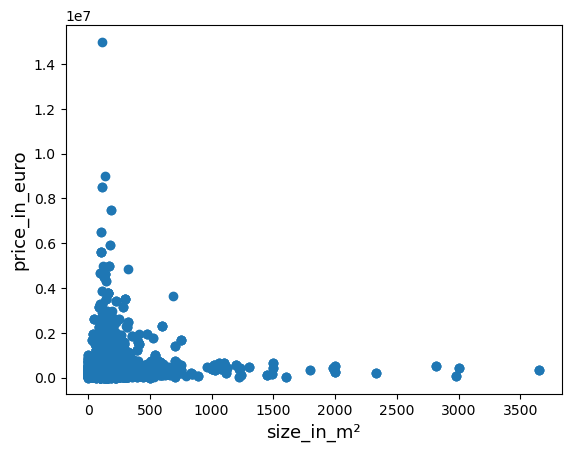

In [311]:
# visualizing data to see outliers
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
plt.scatter(x=data['size_in_m²'], y=data['price_in_euro'])
plt.ylabel('price_in_euro', fontsize=13)
plt.xlabel('size_in_m²', fontsize=13)
plt.show()

In [312]:
# everything above 1000000, i ll consider as outlier
data = data[data['price_in_euro'] < 1000000]
data = data[data['price_in_euro'] > 10000]
data = data[data['size_in_m²'] < 1000]

In [313]:
data

,description_clean,location,location_type,size_in_m²,rooms_final,land_area_in_m²,seller,offer_type,price_in_euro
0,wohnen villenstil zweifamilienhaus nahe dresde...,Großröhrsdorf (Großröhrsdorf),7,180,7,1266,Maklerbüro Haufe,commercial,244000
1,seltener glücksfall vielseitig talentierte dop...,"Eulensteg 28, Markkleeberg (Markkleeberg)",7,140,5,252,WIK24 Immobilien,commercial,490000
2,großteils modern saniertes einfamilienhaus neu...,Neukirch/Lausitz,7,176,7,400,Maklerbüro Haufe,commercial,159000
3,wirklich cooles haus leben,Magdeburg (Westerhüsen),3,156,8,313,Andreas Schmidt Immobilien,commercial,425000
4,individuelles einfamilienhaus bester lage zern...,Königs Wusterhausen (Zernsdorf),6,130,6,820,Gojowczyk Grundstücksverwaltung/ Immobilien,commercial,660000
...,...,...,...,...,...,...,...,...,...
30968,wohnen arbeiten dach ideal handwerker,Wellendingen (Wilflingen),7,124,7,450,frb Immobilien - Frank Rudolf Braun,commercial,489000
30969,mehrfamilienhaus crailsheim,Crailsheim (Crailsheim),6,121,9,650,Aalbok Immobilien,commercial,44900
30970,ökologisch bauen beispielhäuser inspiration,St.Johann (Upfingen),7,119,5,553,Anugraha Schloß Lindich Portfolio- Immobilien ...,commercial,292000
30971,zweifamilienhaus toplage lottstetten,Lottstetten (Lottstetten),7,134,6,1150,Haus &amp; Grund Hochrhein Service GmbH,commercial,69000


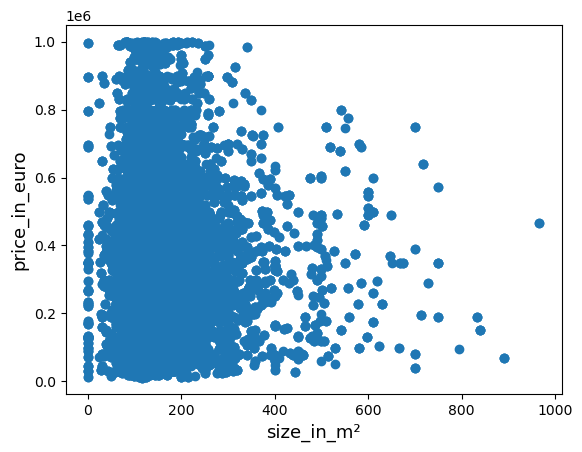

In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
plt.scatter(x=data['size_in_m²'], y=data['price_in_euro'])
plt.ylabel('price_in_euro', fontsize=13)
plt.xlabel('size_in_m²', fontsize=13)
plt.show()

# Checking for multicolliniarity:

In [315]:
correlations_matrix = data.corr()
display(correlations_matrix)
# no high colliniarities

,size_in_m²,rooms_final,land_area_in_m²,price_in_euro
size_in_m²,1.000000,0.003651,0.001579,0.004778
rooms_final,0.003651,1.000000,0.081264,-0.005504
land_area_in_m²,0.001579,0.081264,1.000000,-0.004251
price_in_euro,0.004778,-0.005504,-0.004251,1.000000


In [317]:
data.to_csv('data_clean.csv', index=False)